In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import pandas as pd

In [2]:
df = pd.read_csv("prices.csv")
df


,Unnamed: 0.1,Unnamed: 0,area,prices,predict prices,predicted_prices
0,0,0,2600,550000,1800,425034.246575
1,1,1,3000,565000,1000,316404.109589
2,2,2,3200,610000,1820,427750.000000
3,3,3,3600,680000,3562,664292.123288
4,4,4,4000,725000,1200,343561.643836


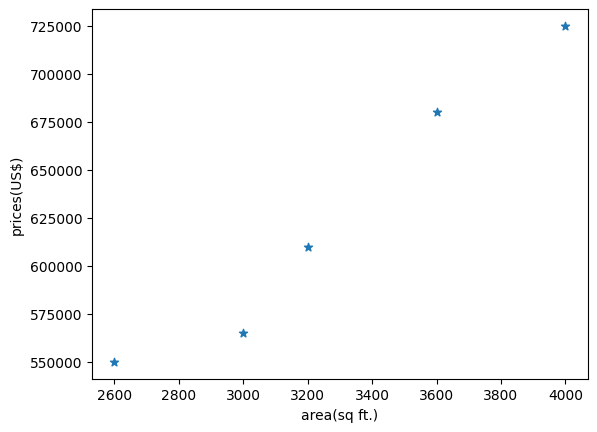

In [3]:
%matplotlib inline
plt.xlabel("area(sq ft.)")
plt.ylabel("prices(US$)")
plt.scatter(df.area,df.prices, marker="*")

In [4]:
lin = linear_model.LinearRegression()
lin.fit(df[['area']], df.prices)

LinearRegression()

In [5]:
lin.predict([[3300]])


C:\Users\subra\anaconda3\envs\price-prediction\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [6]:
lin.coef_

array([135.78767123])

In [7]:
lin.intercept_

180616.43835616432

In [8]:
 3300*135.78 +180616.43835
#     y=mx+c 
#     price= coef*area + intercept

628690.43835

In [9]:
new_areas=df['predict prices']
new_areas

0    1800
1    1000
2    1820
3    3562
4    1200
Name: predict prices, dtype: int64

In [10]:
df['predicted_prices']=lin.predict(list(map(lambda x:[x],new_areas)))
# df.to_csv("prices.csv")
df

C:\Users\subra\anaconda3\envs\price-prediction\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,Unnamed: 0.1,Unnamed: 0,area,prices,predict prices,predicted_prices
0,0,0,2600,550000,1800,425034.246575
1,1,1,3000,565000,1000,316404.109589
2,2,2,3200,610000,1820,427750.000000
3,3,3,3600,680000,3562,664292.123288
4,4,4,4000,725000,1200,343561.643836


In [11]:
df.to_csv("prices.csv")

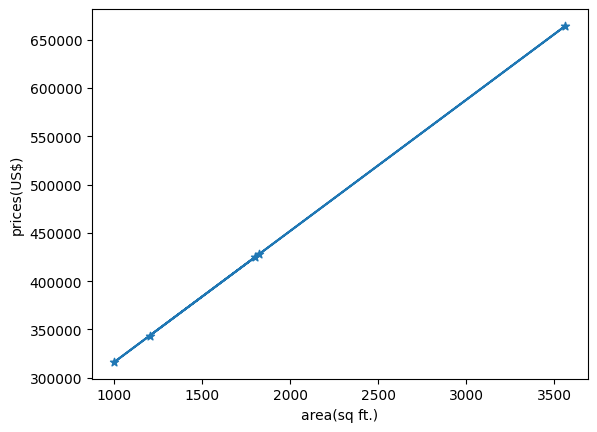

In [12]:
%matplotlib inline
plt.xlabel("area(sq ft.)")
plt.ylabel("prices(US$)")
plt.scatter(df["predict prices"],df.predicted_prices, marker="*")
plt.plot(df["predict prices"],df.predicted_prices)

In [13]:
import pickle

In [14]:
with open('home_price_model', 'wb') as f:
    pickle.dump(lin,f)

In [15]:
with open('home_price_model', 'rb') as f:
    model=pickle.load(f)

In [16]:
model.predict([[3600]])

C:\Users\subra\anaconda3\envs\price-prediction\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([669452.05479452])

In [18]:
import joblib

In [19]:
joblib.dump(model,'model_joblib')

['model_joblib']

In [22]:
joblib_model=joblib.load('model_joblib')

In [24]:
joblib_model.predict([[3600]])

C:\Users\subra\anaconda3\envs\price-prediction\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([669452.05479452])